In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [278]:
data = pd.read_csv('../insurance_data.csv')

In [279]:
data = data.drop('index', axis=1).drop('PatientID',axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1335 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1337 non-null   object 
 8   claim          1340 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 94.3+ KB


<AxesSubplot: xlabel='region', ylabel='claim'>

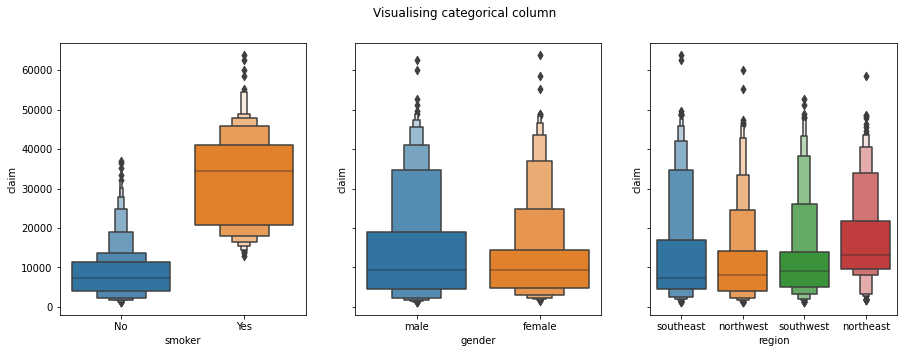

In [280]:
fig, axes= plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Visualising categorical column')
sns.boxenplot(x='smoker', y='claim', data=data, ax=axes[0])
sns.boxenplot(x='gender', y='claim', data=data, ax=axes[1])
sns.boxenplot(x='region', y='claim', data=data, ax=axes[2])

<function matplotlib.pyplot.show(close=None, block=None)>

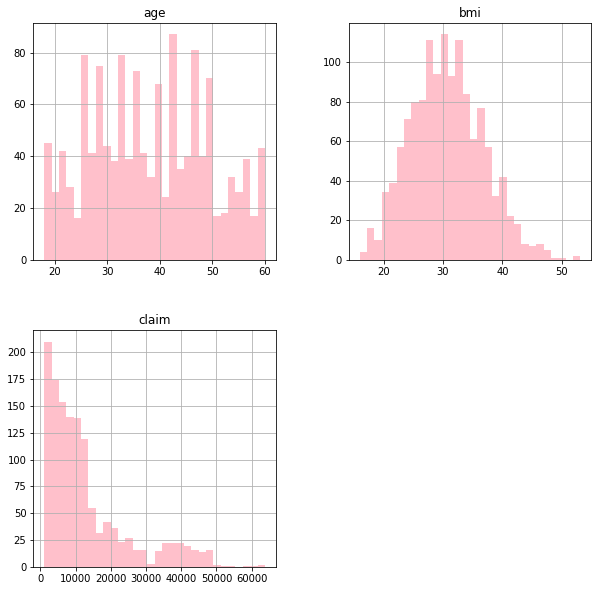

In [281]:
data[['age', 'bmi', 'smoker','region', 'claim']].hist(bins=30, figsize=(10,10), color='pink')
plt.show

In [282]:

map_yes_no = {'Yes': 1, 'No': 0}
map_gender = {'male' : 1, 'female':0}
map_region = {'northeast':1,'northwest':2,'southeast':3,'southwest':4}
data['diabetic_num'] = data['diabetic'].map(map_yes_no)
data['smoker_num'] = data['smoker'].map(map_yes_no)
data['gender_num'] = data['gender'].map(map_gender)
data['region_num'] = data['region'].map(map_region)

data_new = data.drop('diabetic', axis=1).drop('smoker', axis=1).drop('gender', axis=1).drop('region', axis=1)

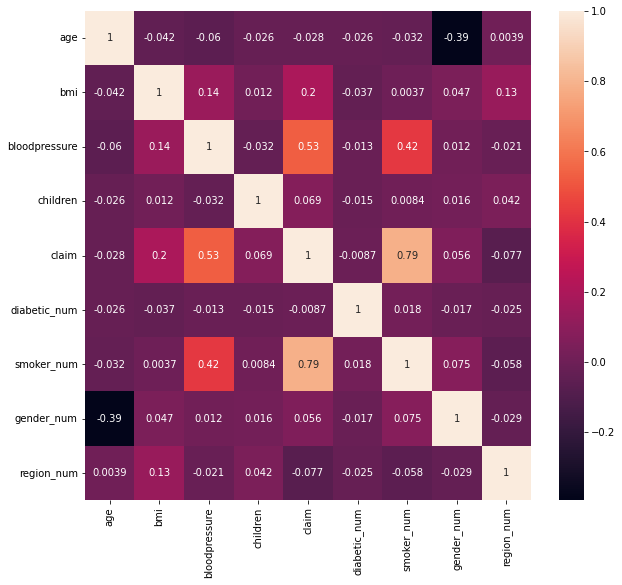

In [283]:
plt.figure(figsize=(10,9))
sns.heatmap(data_new.corr(), annot= True)
plt.show()

In [284]:
data_new.dropna(axis=0, inplace=True)

data_new

,age,bmi,bloodpressure,children,claim,diabetic_num,smoker_num,gender_num,region_num
0,39.0,23.2,91,0,1121.87,1,0,1,3.0
1,24.0,30.1,87,0,1131.51,0,0,1,3.0
7,19.0,41.1,100,0,1146.80,0,0,1,2.0
8,20.0,43.0,86,0,1149.40,0,0,1,2.0
9,30.0,53.1,97,0,1163.46,0,0,1,2.0
...,...,...,...,...,...,...,...,...,...
1335,44.0,35.5,88,0,55135.40,1,1,0,2.0
1336,59.0,38.1,120,1,58571.07,0,1,0,1.0
1337,30.0,34.5,91,3,60021.40,1,1,1,2.0
1338,37.0,30.4,106,0,62592.87,0,1,1,3.0


In [285]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1332 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1332 non-null   float64
 1   bmi            1332 non-null   float64
 2   bloodpressure  1332 non-null   int64  
 3   children       1332 non-null   int64  
 4   claim          1332 non-null   float64
 5   diabetic_num   1332 non-null   int64  
 6   smoker_num     1332 non-null   int64  
 7   gender_num     1332 non-null   int64  
 8   region_num     1332 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 104.1 KB


In [286]:
x = data_new.drop('claim', axis =1)
y = data_new['claim']

x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1332 entries, 0 to 1339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1332 non-null   float64
 1   bmi            1332 non-null   float64
 2   bloodpressure  1332 non-null   int64  
 3   children       1332 non-null   int64  
 4   diabetic_num   1332 non-null   int64  
 5   smoker_num     1332 non-null   int64  
 6   gender_num     1332 non-null   int64  
 7   region_num     1332 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 93.7 KB


In [287]:
scale = StandardScaler()

# x_scale = scale.fit_transform(x)
x_scale = x

x_trains, x_tests, y_train, y_test = train_test_split(x_scale,y,test_size = 0.35, random_state=45)

In [288]:
# Define the polynomial regression model
model = LinearRegression()


# Perform grid search with cross-validation
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(x_trains, y_train)

# # Retrieve the best degree

for degree in range(5):
    poly_features = PolynomialFeatures(degree=degree+1)
    x_trains_poly = poly_features.fit_transform(x_trains)
    poly_features.transform
    model.fit(x_trains_poly, y_train)

    x_tests_poly = poly_features.transform(x_tests)

# Make predictions and evaluate the model
    y_pred = model.predict(x_tests_poly)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)
    
    print("Degree:",degree+1)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared: ",rmse)
    print("R2 Score :",r2)
    print()

Degree: 1
Mean Squared Error: 47836732.94473583
Root Mean Squared:  6916.410408928597
R2 Score : 0.6986350940284348

Degree: 2
Mean Squared Error: 33667837.65516175
Root Mean Squared:  5802.399301596
R2 Score : 0.7878972056696383

Degree: 3
Mean Squared Error: 36749760.18166921
Root Mean Squared:  6062.158046576253
R2 Score : 0.768481513266782

Degree: 4
Mean Squared Error: 251043089.57802707
Root Mean Squared:  15844.339354420148
R2 Score : -0.5815372921243531

Degree: 5
Mean Squared Error: 402867366344.4514
Root Mean Squared:  634718.3362283238
R2 Score : -2537.0095692920477



In [289]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('lr', LinearRegression())
])

# pipeline = PolynomialFeatures(degree=2)
X = pipeline['poly'].fit_transform(x_trains)
pipeline['lr'].fit(X,y_train)

LinearRegression()

In [290]:
best_degree = 2

poly_features = PolynomialFeatures(degree=best_degree)
x_trains_poly = poly_features.fit_transform(x_trains)
model.fit(x_trains_poly, y_train)

x_tests_poly = poly_features.transform(x_tests)

# Make predictions and evaluate the model
y_pred = model.predict(x_tests_poly)
r2_score(y_pred=y_pred,y_true=y_test)

0.7878972056696383

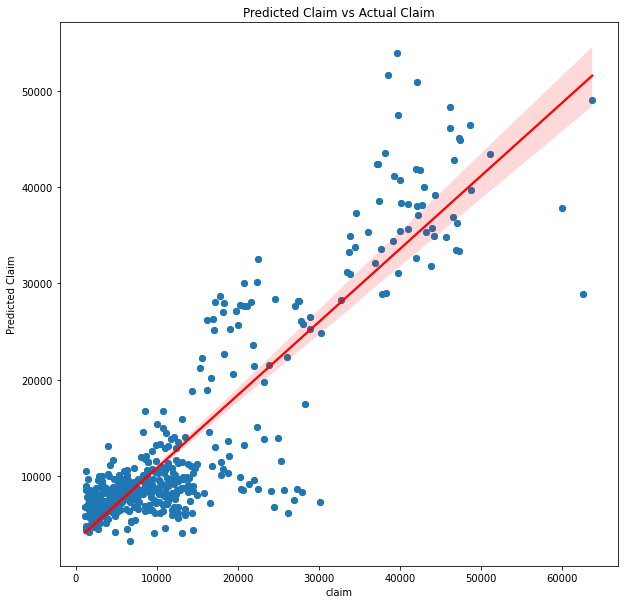

In [291]:
fig = plt.subplots(figsize=(10,10))
plt.scatter(y_test,y_pred)
plt.title("Predicted Claim vs Actual Claim")
plt.xlabel('Actual Claim')
plt.ylabel('Predicted Claim')
sns.regplot(x=y_test,y=y_pred, line_kws={'color':'r'})
plt.show()

In [292]:
# import pickle

# filename = 'finalPolyModel_pkl'
# with open(filename,'wb') as files :
#     pickle.dump(pipeline, open(filename,'wb'))

In [293]:
# filename = 'finalPolyModel_pkl'
# with open(filename,'rb') as f :
#     pipeline2=pickle.load(f)

In [294]:
# data0 = np.array([[25,25,85,0,1,1,1,1]])
# # testdata = np.array([[temp]])


# test = pipeline2['poly'].transform(data0)
# pred = pipeline2['lr'].predict(test)